In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
print("Data Size  :" ,df.size)
print("Data Shape :" ,df.shape)

Data Size  : 8000000
Data Shape : (1000000, 8)


In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

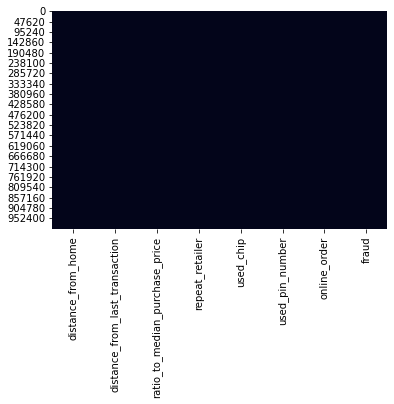

In [5]:
sns.heatmap(df.isnull(), cbar=False)

In [6]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

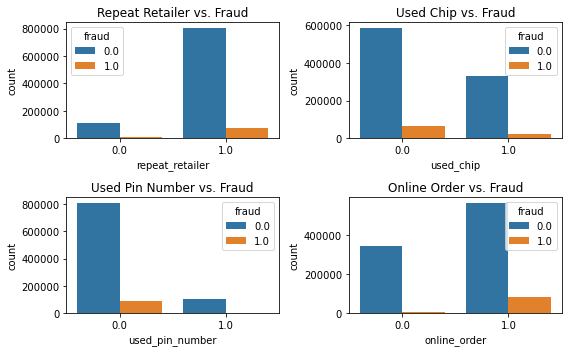

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

sns.countplot(data=df, x='repeat_retailer', hue='fraud', ax=axes[0, 0])

sns.countplot(data=df, x='used_chip', hue='fraud', ax=axes[0, 1])

sns.countplot(data=df, x='used_pin_number', hue='fraud', ax=axes[1, 0])

sns.countplot(data=df, x='online_order', hue='fraud', ax=axes[1, 1])

axes[0, 0].set_title('Repeat Retailer vs. Fraud')
axes[0, 1].set_title('Used Chip vs. Fraud')
axes[1, 0].set_title('Used Pin Number vs. Fraud')
axes[1, 1].set_title('Online Order vs. Fraud')

plt.tight_layout()

plt.show()

<AxesSubplot:>

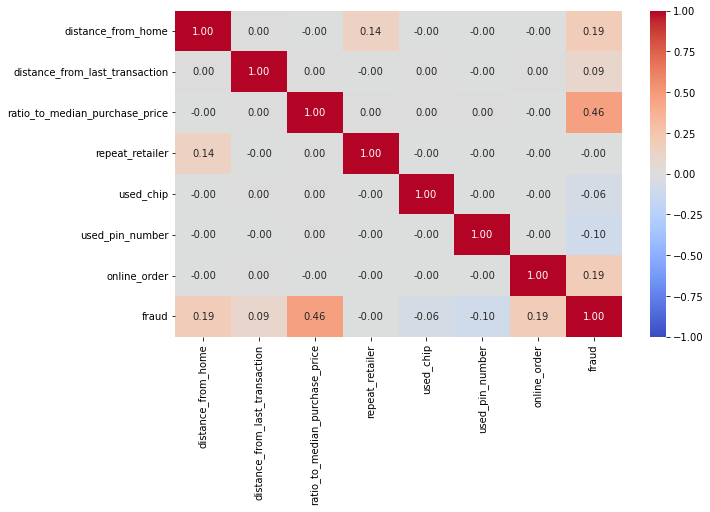

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

In [11]:
X = df.drop('fraud', axis = 1)
y = df['fraud']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [21]:
y_pred = model.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[271658,   1978],
       [ 10539,  15825]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273636
         1.0       0.89      0.60      0.72     26364

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

